# Analysing the 3 main greenhouse gasses

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot ,offline
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import seaborn as sns

In [16]:
df =pd.read_csv('DataSet/pollution_us_2000_2016.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [18]:
new_df = df.drop(['Unnamed: 0','State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour','CO Units', 'CO Mean','CO 1st Max Value', 'CO 1st Max Hour'],axis = 1)

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   City        object 
 1   Date Local  object 
 2   NO2 AQI     int64  
 3   O3 AQI      int64  
 4   SO2 AQI     float64
 5   CO AQI      float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ MB


In [21]:
# new_df['AverageTemperature']

In [22]:


no2_df = new_df.drop(['O3 AQI', 'SO2 AQI', 'CO AQI'],1)

no2_df = no2_df.sort_values('NO2 AQI', ascending = 0).drop_duplicates(subset='Date Local', keep='first')

no2_df['Date Local'] = pd.to_datetime(no2_df['Date Local'])
no2_df.index = no2_df['Date Local']
del no2_df['Date Local']

no2_df = no2_df[no2_df['City'] == 'New York']

no2_df = no2_df.resample("A").mean()
no2_df= no2_df.sort_index()
no2_df = no2_df.dropna()
no2_df.head()

,NO2 AQI
Date Local,
2000-12-31,70.000000
2001-12-31,75.735294
2002-12-31,71.692308
2003-12-31,66.148148
2004-12-31,64.921053


In [23]:
so2_df = new_df.drop(['O3 AQI', 'NO2 AQI', 'CO AQI'],1)
so2_df = so2_df.sort_values('SO2 AQI',ascending = 0).drop_duplicates(subset='Date Local', keep='first')
so2_df['Date Local'] = pd.to_datetime(so2_df['Date Local'])
so2_df.index = so2_df['Date Local']
del so2_df['Date Local']
so2_df = so2_df[so2_df['City'] == 'New York']
so2_df = so2_df.resample("A").mean()
so2_df= so2_df.sort_index()
so2_df = so2_df.dropna()
so2_df.head()

,SO2 AQI
Date Local,
2000-12-31,62.476190
2001-12-31,61.285714
2002-12-31,59.342105
2003-12-31,59.388889
2004-12-31,53.675676


In [24]:
co_df = new_df.drop(['SO2 AQI', 'NO2 AQI', 'O3 AQI'],1)
co_df = co_df.sort_values('CO AQI',ascending = 0).drop_duplicates(subset='Date Local', keep='first')
co_df['Date Local'] = pd.to_datetime(co_df['Date Local'])
co_df.index = co_df['Date Local']
del co_df['Date Local']
co_df = co_df[co_df['City'] == 'New York']
co_df = co_df.resample("A").mean()
co_df= co_df.sort_index()
co_df = co_df.dropna()
co_df.head()

,CO AQI
Date Local,
2000-12-31,30.250000
2001-12-31,19.000000
2002-12-31,17.625000
2003-12-31,19.357143
2004-12-31,15.538462


In [25]:
df = pd.read_csv("C:/DataSet/GlobalLandTemperaturesByCity.csv")
df = df[df['Country'] == 'United States']
df = df[df['City'] == 'New York']
df = df.drop({"AverageTemperatureUncertainty", "Latitude", "Longitude"}, 1)

df['Date Local'] = pd.to_datetime(df['dt'])
df.index = df['Date Local']
del df['dt'],df['City'],df['Country']
df.dropna()

df = df.resample("A").mean()

df = df.dropna()
df = df.sort_index()

df.head()

,AverageTemperature
Date Local,
1743-12-31,3.264000
1744-12-31,11.660375
1745-12-31,1.134500
1750-12-31,10.071455
1751-12-31,10.794625


In [26]:
j1 = pd.merge(df, no2_df, left_index = True, right_index = True, how='inner')
j2 = pd.merge(so2_df, j1, left_index = True, right_index = True, how='inner')
j3 = pd.merge(co_df, j2, left_index = True, right_index = True, how='inner')
j3.head()

,CO AQI,SO2 AQI,AverageTemperature,NO2 AQI
Date Local,,,,
2000-12-31,30.250000,62.476190,9.969083,70.000000
2001-12-31,19.000000,61.285714,10.931000,75.735294
2002-12-31,17.625000,59.342105,11.252167,71.692308
2003-12-31,19.357143,59.388889,9.836000,66.148148
2004-12-31,15.538462,53.675676,10.389500,64.921053


In [27]:
j3_norm = (j3 - j3.mean()) / (j3.max() - j3.min())
j3_norm.head()

,CO AQI,SO2 AQI,AverageTemperature,NO2 AQI
Date Local,,,,
2000-12-31,0.654585,0.357917,-0.404637,0.347543
2001-12-31,0.132401,0.329215,0.008577,0.575799
2002-12-31,0.068578,0.282354,0.146542,0.414894
2003-12-31,0.148978,0.283482,-0.461806,0.194245
2004-12-31,-0.028272,0.145735,-0.224037,0.145408


In [28]:
j3_norm = j3_norm + 0.54

In [29]:
trace0 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['AverageTemperature'],
    mode = 'lines',
    name = 'Temperature'
)

trace1 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['CO AQI'],
    mode = 'lines',
    name = 'Carbon Monoxide'
)

trace3 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['SO2 AQI'],
    mode = 'lines',
    name = 'Sulphur Dioxide'
)

trace4 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['NO2 AQI'],
    mode = 'lines',
    name = 'Nitrogen Dioxide'
)

layout = go.Layout(
    title='Temperature and Pollution Plots',
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Normalized Values',
    )
)

data = [trace0,trace1,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
iplot(fig)
#iplot.savefig("Analysis of 3 main Greenhouse gases")
#offline.plot(fig,image = 'png', image_filename='Analysis of 3 main Greenhouse gases')

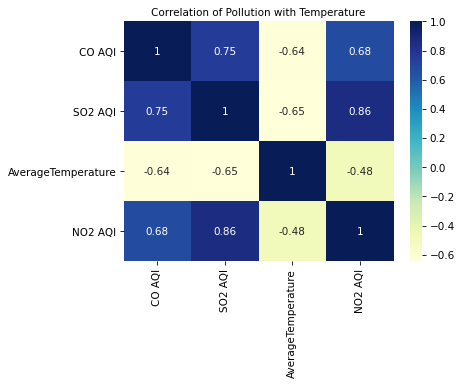

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure(dpi = 75)

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8]) 
sns.heatmap(j3_norm.corr(method='pearson'), annot = True, cmap="YlGnBu")
ax.set_title("Correlation of Pollution with Temperature", fontsize=10)
plt.show()
plt.savefig("Correlation of Pollution with Temperature.png")